In [27]:
import pandas as pd
import numpy as np
import seaborn as sb
from matplotlib import pyplot as plot
from sklearn.preprocessing import LabelEncoder

pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 500)

import warnings
warnings.filterwarnings('ignore')

# Loading the dataset

In [28]:
df = pd.read_csv("loan.csv")

## Metadata

In [29]:
df.shape

(39717, 111)

In [30]:
df.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,...,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,14035.000000,2786.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39020.000000,39678.0,0.0,0.0,0.0,0.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,35.900962,69.698134,9.294408,0.055065,13382.528086,22.088828,51.227887,50.989768,12153.596544,11567.149118,9793.348813,2263.663172,1.363015,95.221624,12.406112,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.043260,0.0,NaN,NaN,NaN,NaN
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,22.020060,43.822529,4.400282,0.237200,15885.016641,11.401709,375.172839,373.824457,9042.040766,8942.672613,7065.522127,2608.111964,7.289979,688.744771,148.671593,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.204324,0.0,NaN,NaN,NaN,NaN
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,18.000000,22.000000,6.000000,0.000000,3703.000000,13.000000,0.000000,0.000000,5576.930000,5112.310000,4600.000000,662.180000,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
50%,6.656650e+05,8.508120e+05,10000.000000,9600.000000,8975.000000,280.220000,5.900000e+04,13.400000,0.000000,1.000000,34.000000,90.000000,9.000000,0.000000,8850.000000,20.000000,0.000000,0.000000,9899.640319,9287.150000,8000.000000,1348.910000,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
75%,8.377550e+05,1.047339e+06,15000.000000,15000.000000,14400.000000,430.780000,8.230000e+04,18.600000,0.000000,1.000000,52.000000,104.000000,12.000000,0.000000,17058.000000,29.000000,0.000000,0.000000,16534.433040,15798.810000,13653.260000,2833.400000,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
max,1.077501e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,120.000000,129.000000,44.000000,4.000000,149588.000000,90.000000,6311.470000,6307.370000,58563.679930,58563.680000,35000.020000,23563.680000,180.200000,29623.350000,7002.190000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,0.0,NaN,NaN,NaN,NaN


In [31]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,...,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


# Data Cleaning

### Dropping columns which have more than 20% missing values

In [33]:
cols_missing_values = round(100*df.isnull().mean(),2)> 20

In [34]:
df = df.drop(cols_missing_values[cols_missing_values].index, axis=1)

In [35]:
df=df.drop(['url','last_pymnt_d', 'last_pymnt_amnt', 'total_rec_int','total_pymnt_inv', 'total_rec_late_fee', 
                      'total_rec_prncp', 'total_pymnt', 'collection_recovery_fee', 'recoveries',
                      'funded_amnt','funded_amnt_inv', 'id', 'member_id','last_credit_pull_d'], axis=1)

In [36]:
df.dropna(axis='columns',how='all',inplace =True)

In [37]:
#converting the string cols to number cols by removing unwanted chars

df['term']= df['term'].map(lambda x: x.strip('months'))
df['int_rate']= df['int_rate'].map(lambda x: x.strip('%'))
df['emp_length']= df['emp_length'].astype(str).str.replace('\D+','')
df['revol_util']= df['revol_util'].astype(str).str.rstrip('%')

In [38]:
# impute missing values which are <20% 

df['emp_title'] = np.where(df['emp_title'].isnull(), 'No Job Title', df['emp_title'])
df['title'] = np.where(df['title'].isnull(), 'No Loan Title', df['title'])
df['pub_rec_bankruptcies'].fillna(df['pub_rec_bankruptcies'].mode()[0], inplace=True)

In [39]:
df.shape

(39717, 38)

In [40]:
df.describe()

,loan_amnt,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,total_acc,out_prncp,out_prncp_inv,collections_12_mths_ex_med,policy_code,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
count,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39661.0,39717.0,39717.0,39661.0,39717.0,39717.000000,39678.0
mean,11219.443815,324.561922,6.896893e+04,13.315130,0.146512,0.869200,9.294408,0.055065,13382.528086,22.088828,51.227887,50.989768,0.0,1.0,0.0,0.0,0.0,0.042501,0.0
std,7456.670694,208.874874,6.379377e+04,6.678594,0.491812,1.070219,4.400282,0.237200,15885.016641,11.401709,375.172839,373.824457,0.0,0.0,0.0,0.0,0.0,0.202603,0.0
min,500.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.0,1.0,0.0,0.0,0.0,0.000000,0.0
25%,5500.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,6.000000,0.000000,3703.000000,13.000000,0.000000,0.000000,0.0,1.0,0.0,0.0,0.0,0.000000,0.0
50%,10000.000000,280.220000,5.900000e+04,13.400000,0.000000,1.000000,9.000000,0.000000,8850.000000,20.000000,0.000000,0.000000,0.0,1.0,0.0,0.0,0.0,0.000000,0.0
75%,15000.000000,430.780000,8.230000e+04,18.600000,0.000000,1.000000,12.000000,0.000000,17058.000000,29.000000,0.000000,0.000000,0.0,1.0,0.0,0.0,0.0,0.000000,0.0
max,35000.000000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,44.000000,4.000000,149588.000000,90.000000,6311.470000,6307.370000,0.0,1.0,0.0,0.0,0.0,2.000000,0.0


In [41]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,5000,36,10.65,162.87,B,B2,No Job Title,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,3,0,13648,83.70,9,f,0.00,0.00,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,2500,60,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,car,bike,309xx,GA,1.00,0,Apr-99,5,3,0,1687,9.40,4,f,0.00,0.00,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,2400,36,15.96,84.33,C,C5,No Job Title,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,2,0,2956,98.50,10,f,0.00,0.00,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,10000,36,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,other,personel,917xx,CA,20.00,0,Feb-96,1,10,0,5598,21,37,f,0.00,0.00,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,3000,60,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,n,other,Personal,972xx,OR,17.94,0,Jan-96,0,15,0,27783,53.90,38,f,524.06,524.06,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


In [42]:
df.nunique()

loan_amnt                       885
term                              2
int_rate                        371
installment                   15383
grade                             7
sub_grade                        35
emp_title                     28821
emp_length                       12
home_ownership                    5
annual_inc                     5318
verification_status               3
issue_d                          55
loan_status                       3
pymnt_plan                        1
purpose                          14
title                         19616
zip_code                        823
addr_state                       50
dti                            2868
delinq_2yrs                      11
earliest_cr_line                526
inq_last_6mths                    9
open_acc                         40
pub_rec                           5
revol_bal                     21711
revol_util                     1090
total_acc                        82
initial_list_status         

## Standardize the values

In [43]:
# convert all string cols to uppercase
df = df.applymap(lambda x: x.upper() if type(x) == str else x)

In [44]:
# change the dates cols dtype to datetime
df['issue_d'] = pd.to_datetime(df['issue_d'], format='%b-%y')
df['earliest_cr_line'] = pd.to_datetime(df['earliest_cr_line'], format='%b-%y')

In [45]:
# change the num cols dtype to int or float
df['revol_util'] = df.revol_util.astype(float)
df['pub_rec_bankruptcies'] = df['pub_rec_bankruptcies'].astype(int)
df['int_rate'] = df.int_rate.astype(float)

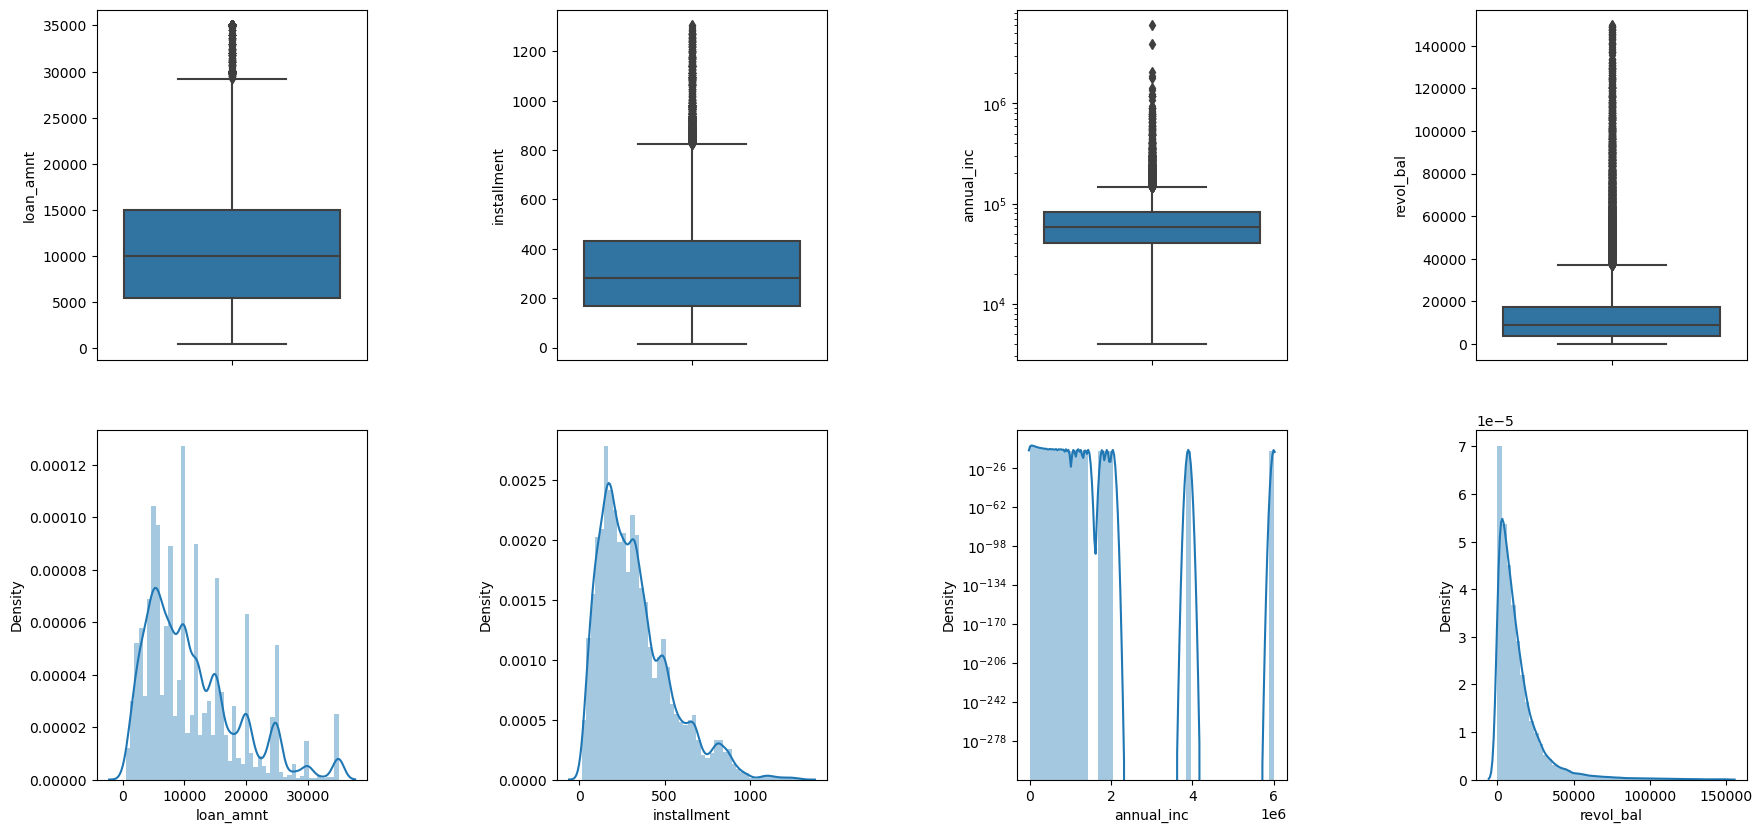

In [46]:
plot.figure(figsize=(12,10))
plot.subplot(2,4,1)
sb.boxplot(y=df['loan_amnt'])

plot.subplot(2,4,2)
sb.boxplot(y=df['installment'])

plot.subplot(2,4,3)
sb.boxplot(y=df['annual_inc'])
plot.yscale('log')

plot.subplot(2,4,4)
sb.boxplot(y=df['revol_bal'])

plot.subplot(2,4,5)
sb.distplot(df['loan_amnt'])

plot.subplot(2,4,6)
sb.distplot(df['installment'])

plot.subplot(2,4,7)
sb.distplot(df['annual_inc'])
plot.yscale('log')

plot.subplot(2,4,8)
sb.distplot(df['revol_bal'])

plot.subplots_adjust(wspace=0.7, right = 1.5)
plot.show()

In [47]:
def handleOutliers(df, columnName):
    IQR = 1.5 * (df[columnName].quantile(0.95) - df[columnName].quantile(0.05))
    upperLimit = df[columnName].quantile(0.95) + IQR
    lowerLimit = df[columnName].quantile(0.05) - IQR
    return df[(df[columnName] > lowerLimit) & (df[columnName] < upperLimit)]

df = handleOutliers(df, 'annual_inc')
df = handleOutliers(df, 'revol_bal')

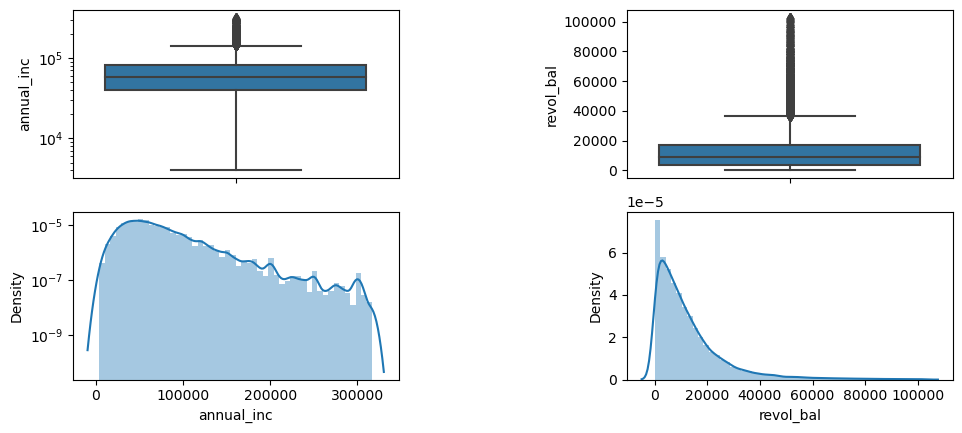

In [58]:
plot.subplot(2,2,1)
sb.boxplot(y=df['annual_inc'])
plot.yscale('log')

plot.subplot(2,2,2)
sb.boxplot(y=df['revol_bal'])

plot.subplot(2,2,3)
sb.distplot(df['annual_inc'])
plot.yscale('log')

plot.subplot(2,2,4)
sb.distplot(df['revol_bal'])

plot.subplots_adjust(wspace=0.7, right = 1.5)
plot.show()

In [59]:
lb = LabelEncoder()
df["purpose_code"] = lb.fit_transform(df["purpose"])

# Analysis

In [66]:
def plot_category(columnName, xLabel, plotOrder = None):
    print("{} \n".format(df[columnName].describe()))
    uniqueCount = df[columnName].nunique()
    
    #To restrict plotting for categories more than 15
    if uniqueCount <= 15:
        #Considering the propotional rate of increase where the propotion is calculated at  status level and
        # then propotions are summed up at category level to calculate the percentage.
        df1 = pd.crosstab(df[columnName],df['loan_status']).apply(lambda r: r/r.sum(), axis=1)
        df2 =  100 * df1['CHARGED OFF'] /df1['CHARGED OFF'].sum()
        
        if plotOrder is None:
            plotOrder = df[columnName].value_counts().index
        
        fig = plot.figure(figsize=(15,5))
        
        #Plot against the columns
        sub1 = fig.add_subplot(121)
        sb.countplot( x=df[columnName],order=plotOrder, ax=sub1)
        sub1.set_xlabel(xLabel)
        sub1.set_ylabel('Number of Borrowers')
        
        #Plot against  Status
        sub2 = fig.add_subplot(122)
        sb.barplot( x=df2.index, y=df2, order=plotOrder, ax=sub2)
        sub2.set_xlabel(xLabel)
        sub2.set_ylabel('Propotional percentage of Defaulters')  

        plot.show()
        
def plot_numeric(columnName, xLabel):
    print("{} \n".format(df[columnName].describe()))
    
    plot.figure(figsize=(10,5))

    sb.distplot(df[columnName])
    plot.xlabel(xLabel)
    plot.ylabel('Number of Borrowers')

    plot.show()

### Grade

count     39374
unique        7
top           B
freq      11925
Name: grade, dtype: object 



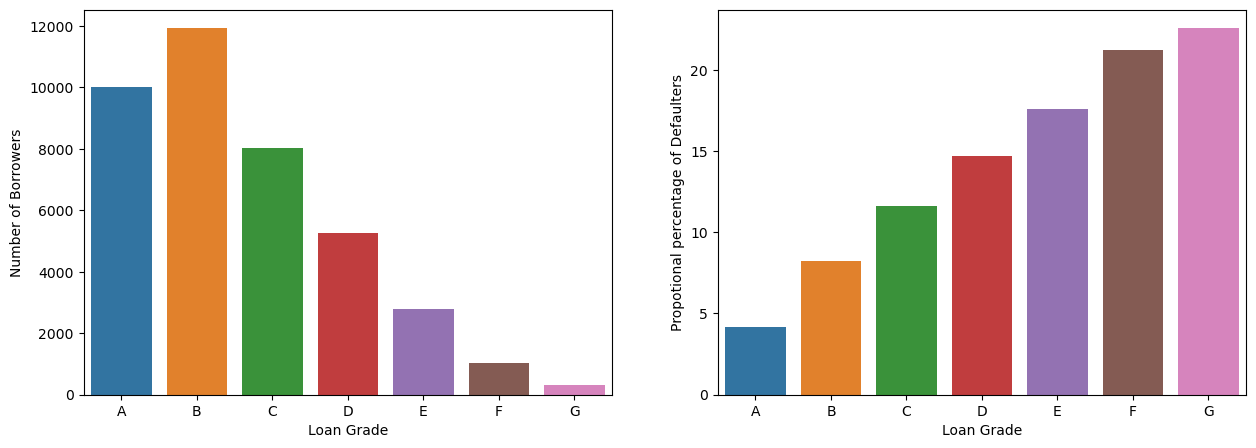

In [53]:
plot_category('grade', 'Loan Grade',['A','B','C','D','E','F','G'])

#### Observations

Loan borrowers decrease from A to G grades.
B grade employees seems to have taken more loans.
Defalt rate is increasing from A to G grades.
G grade employees have defaulted the most.

### Term

count     39374
unique        2
top         36 
freq      28862
Name: term, dtype: object 



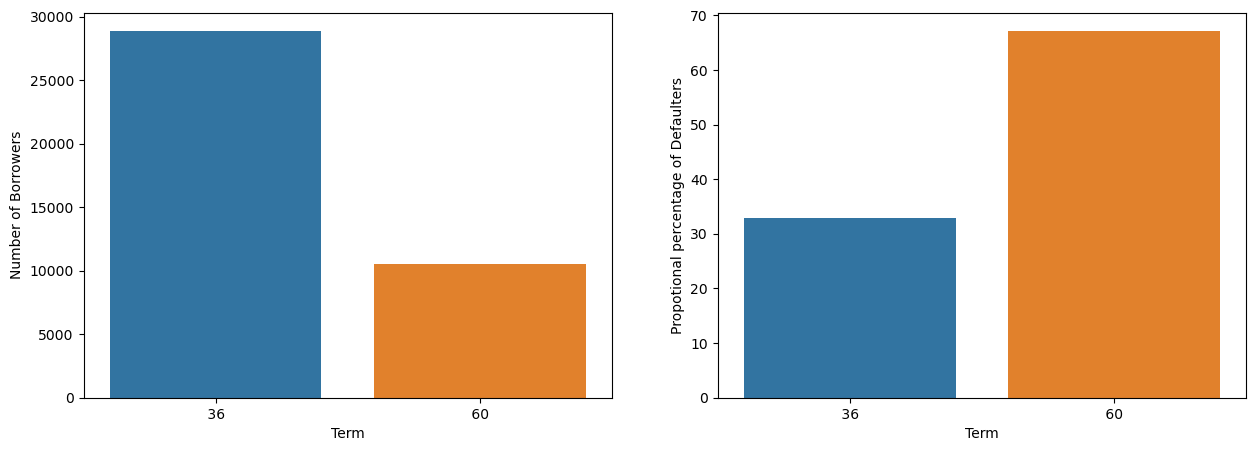

In [54]:
plot_category('term', 'Term')

#### Observations

Term of 36 is the most chosen by borrowers.
Term of 60 have the highest defaulters.


### Home ownership

count     39374
unique        5
top        RENT
freq      18852
Name: home_ownership, dtype: object 



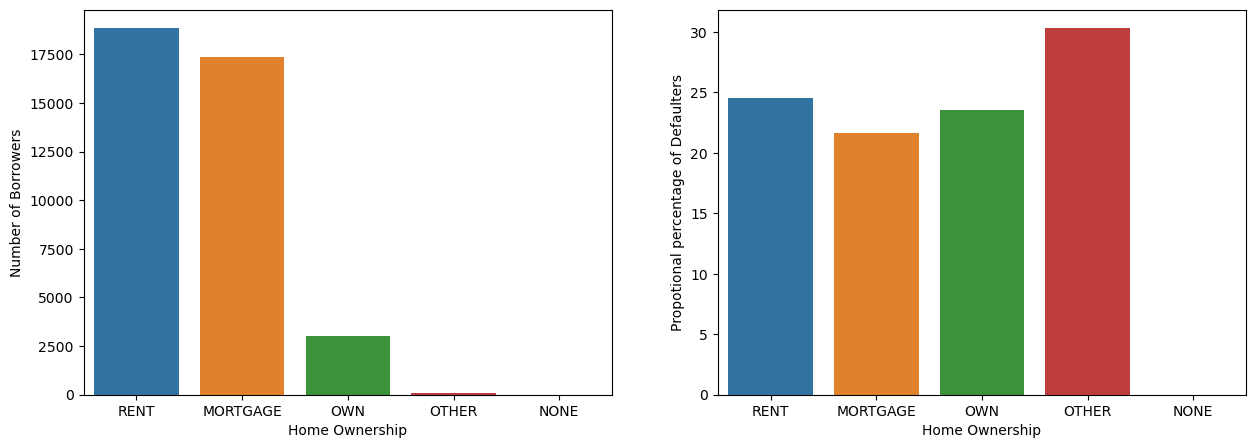

In [56]:
plot_category('home_ownership','Home Ownership')

#### Observations

Employees who rent or have a mortage have taken more loans. Employees who have not clearly mentioned home ownership and have answered as 'OTHER' have the highest default rate.

### Purpose of loan

In [60]:
# Encoded values of purpose col
df.groupby('purpose')['purpose_code'].value_counts()

purpose             purpose_code
CAR                 0                1543
CREDIT_CARD         1                5083
DEBT_CONSOLIDATION  2               18518
EDUCATIONAL         3                 323
HOME_IMPROVEMENT    4                2918
HOUSE               5                 377
MAJOR_PURCHASE      6                2166
MEDICAL             7                 684
MOVING              8                 579
OTHER               9                3965
RENEWABLE_ENERGY    10                101
SMALL_BUSINESS      11               1798
VACATION            12                381
WEDDING             13                938
Name: count, dtype: int64

count    39374.000000
mean         3.868035
std          3.417429
min          0.000000
25%          2.000000
50%          2.000000
75%          6.000000
max         13.000000
Name: purpose_code, dtype: float64 



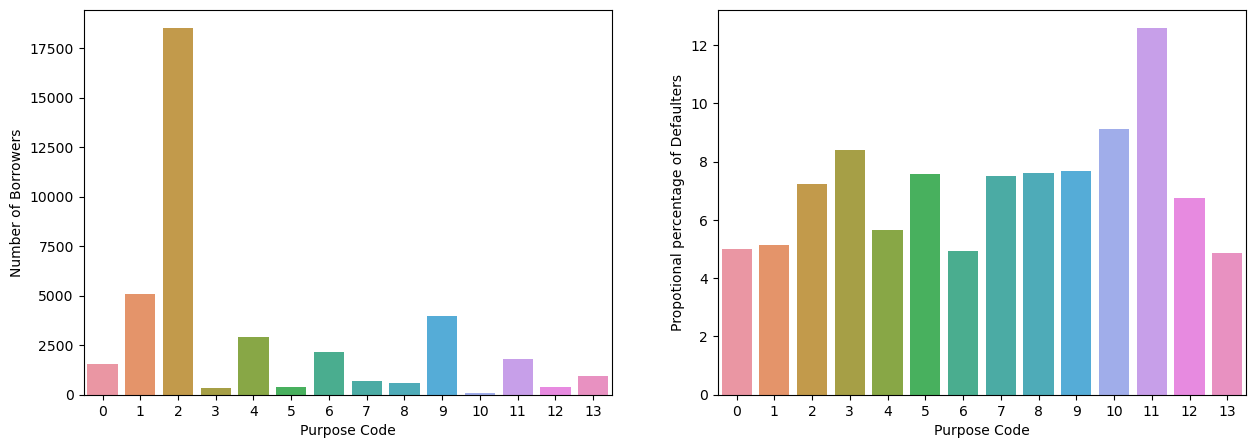

In [61]:
plot_category('purpose_code', 'Purpose Code',[0,1,2,3,4,5,6,7,8,9,10,11,12,13])

### Observations

Default rate is highest in the category of 'Small Business' followed by Renewable energy, Educational

## Number of public record bankruptcies

count    39374.000000
mean         0.042719
std          0.203102
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          2.000000
Name: pub_rec_bankruptcies, dtype: float64 



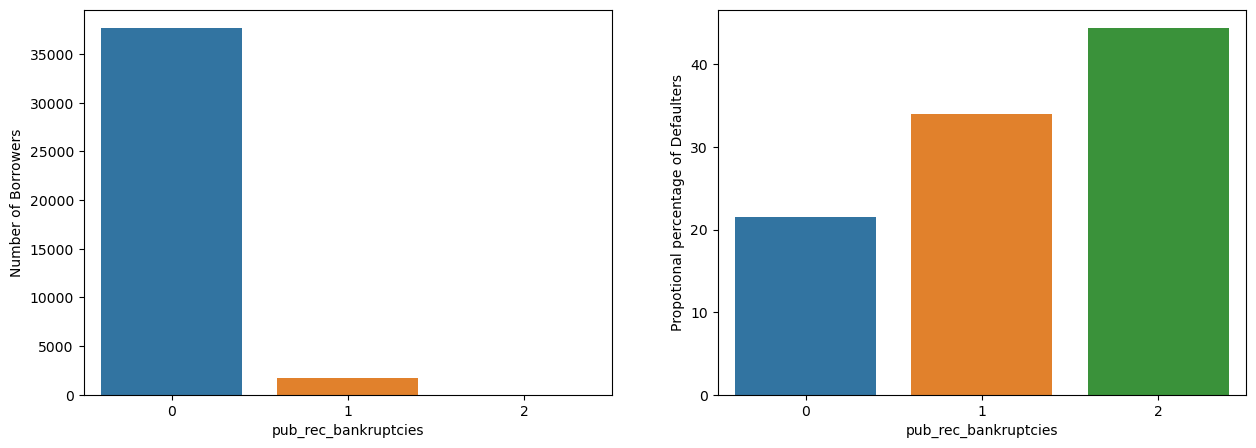

In [62]:
plot_category('pub_rec_bankruptcies','pub_rec_bankruptcies')

#### Observations

Higher is the pub_rec_bankruptcies, higher is the chance to default


### Inquiry in last 6 months

count    39374.000000
mean         0.868695
std          1.068682
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          8.000000
Name: inq_last_6mths, dtype: float64 



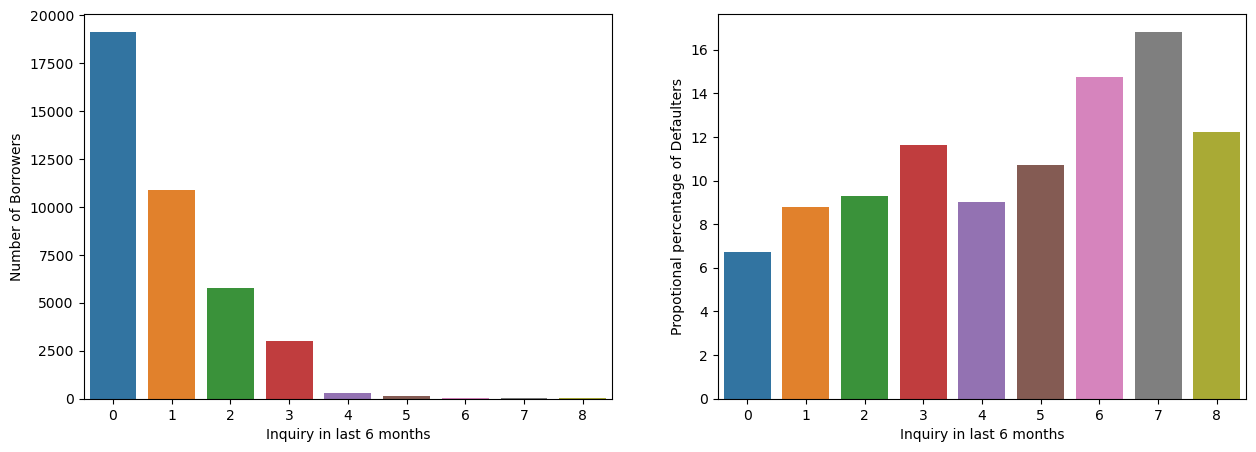

In [63]:
plot_category('inq_last_6mths', 'Inquiry in last 6 months')

#### Observation

Employees who paid the loan inquired less and those who defaulted inquired the most. But not a solid indicator.

## Interest Rate

count    39374.000000
mean        12.015632
std          3.720200
min          5.420000
25%          9.250000
50%         11.860000
75%         14.540000
max         24.590000
Name: int_rate, dtype: float64 



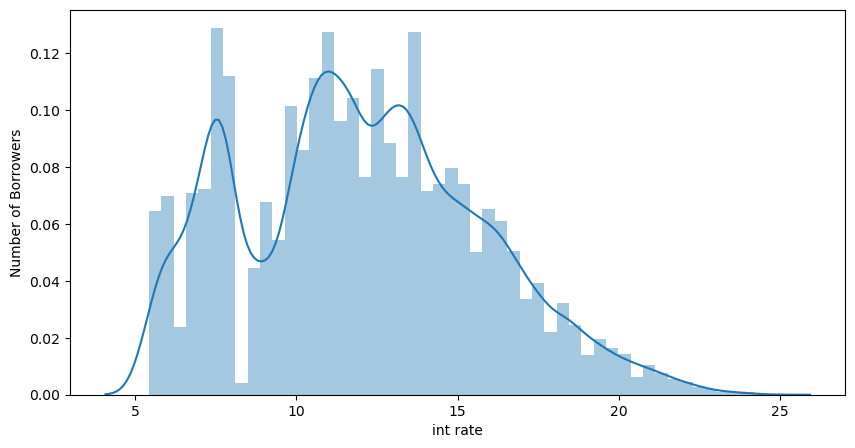

In [67]:
plot_numeric('int_rate','int rate')

In [69]:
### convert the numeric to segments to generate categorical variable
df['interest_rate_bin'] = pd.cut(x=df['int_rate'], bins= ['0','5','10','15','20','25'],labels=['0-5','5-10','10-15','15-20','20-25'])

count     27329
unique        4
top       10-15
freq      11016
Name: interest_rate_bin, dtype: object 



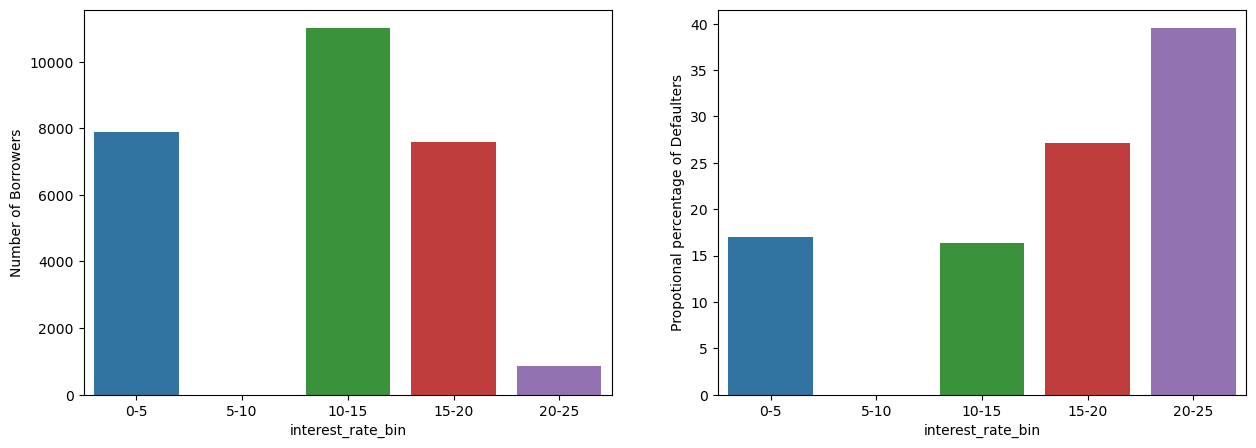

In [70]:
plot_category('interest_rate_bin','interest_rate_bin',['0-5','5-10','10-15','15-20','20-25'])

#### Observation

Defaults are higher for higher interest rates

## Loan amount

count    39374.000000
mean     11169.093183
std       7411.218224
min        500.000000
25%       5500.000000
50%      10000.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64 



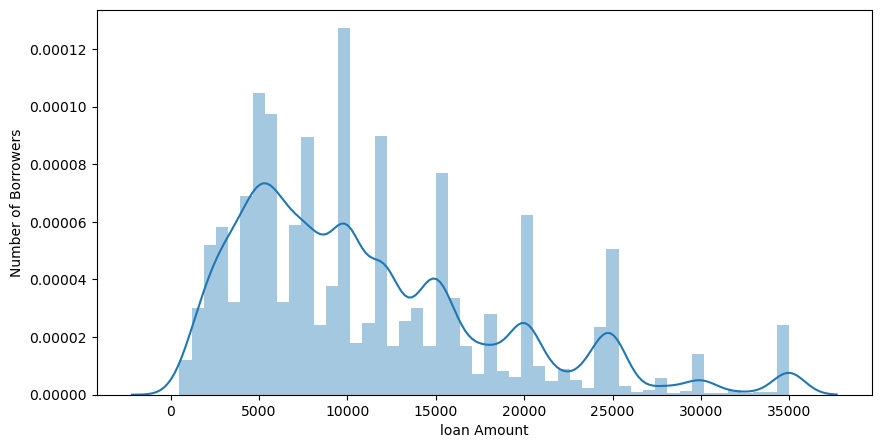

In [71]:
plot_numeric('loan_amnt','loan Amount')

In [72]:
df['loan_amnt_bin'] = pd.cut(x=df['loan_amnt'], bins=[0,5000,10000,15000,20000,25000,30000,35000], labels = ['0-5k','5k-10k','10k-15k','15k-20k','20k-25k','25k-30k','30k-35k'])

count      39374
unique         7
top       5k-10k
freq       12885
Name: loan_amnt_bin, dtype: object 



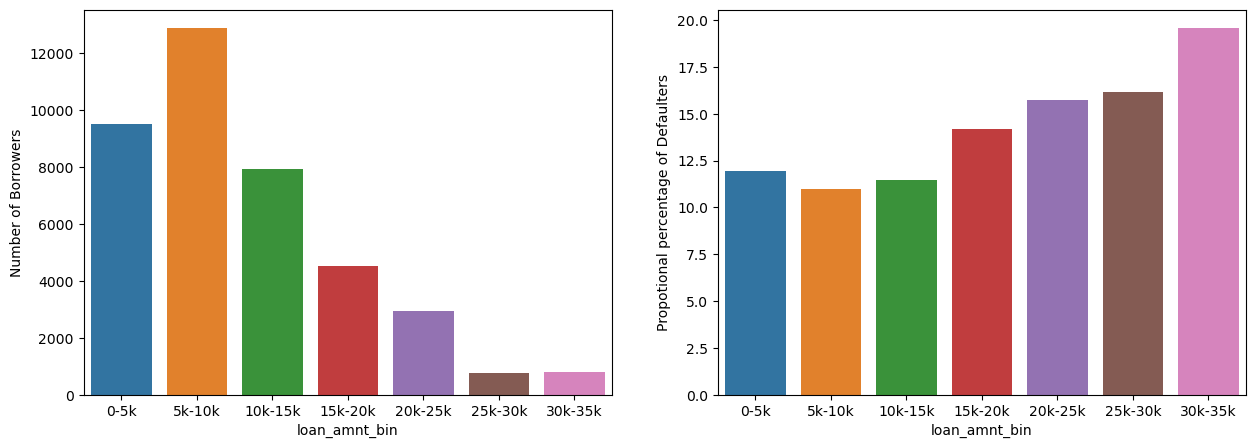

In [73]:
plot_category('loan_amnt_bin','loan_amnt_bin',['0-5k','5k-10k','10k-15k','15k-20k','20k-25k','25k-30k','30k-35k'])

#### Observations

As loan amount increse there is increased tendency to default

## Annual income

count     39374.000000
mean      66342.228609
std       37946.367172
min        4000.000000
25%       40000.000000
50%       58197.500000
75%       81000.000000
max      316800.000000
Name: annual_inc, dtype: float64 



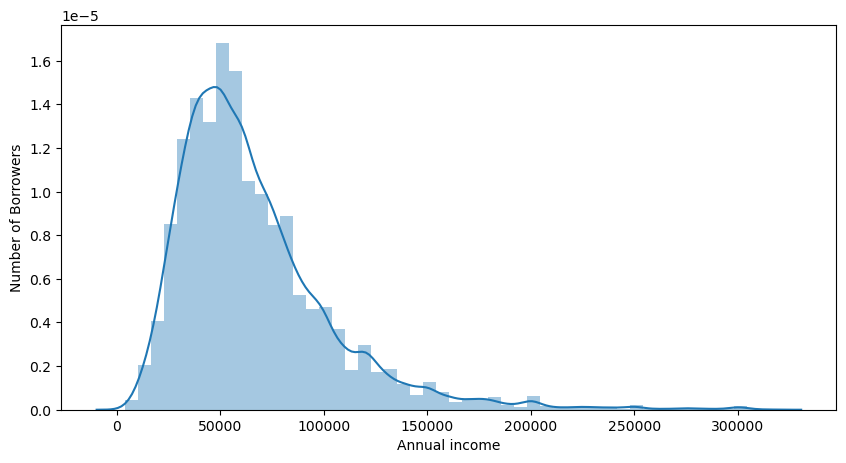

In [74]:
plot_numeric('annual_inc','Annual income')

In [75]:
df['annual_inc_bins']=pd.cut(x=df['annual_inc'],bins=[0,50000,100000,150000,200000,250000,300000],labels=['0-50k','50k-100k','100k-150k','150k-200k','200k-250k','250k-300k'])

count        39361
unique           6
top       50k-100k
freq         18260
Name: annual_inc_bins, dtype: object 



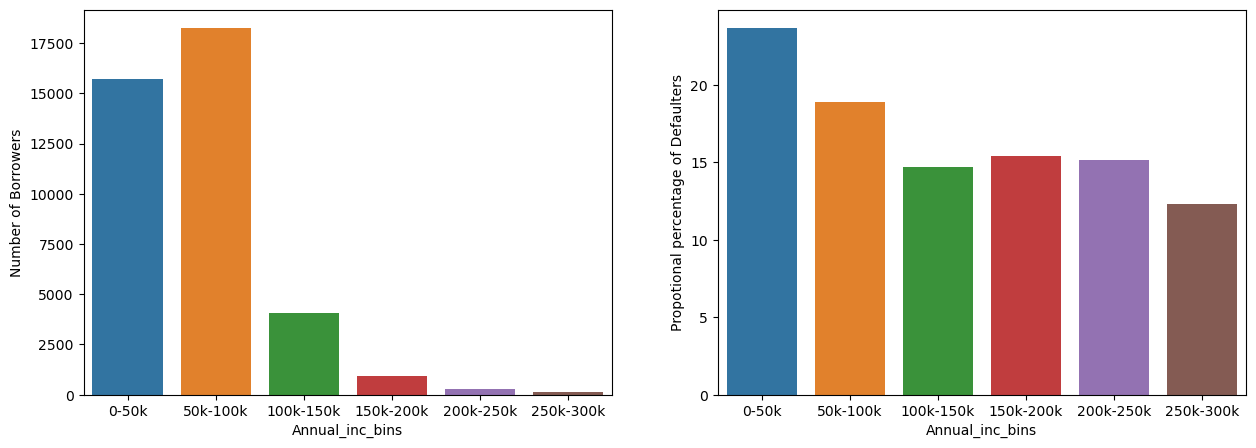

In [76]:
plot_category('annual_inc_bins','Annual_inc_bins',['0-50k','50k-100k','100k-150k','150k-200k','200k-250k','250k-300k'])

#### Observation

As annual income increases there is descrease tendency to default

In [79]:
def plot_cat_vs_cat(xcolumn, ycolumn, xLabel, yLabel, plotOrder = None):
    
    df1 = df[df['loan_status'] == 'CHARGED OFF']
    if plotOrder is None:
        plotOrder = df1[xcolumn].value_counts().index
    
    fig = plot.figure(figsize=(15,5))
    
    #Plot against the columns
    sub1 = fig.add_subplot(121)
    sb.boxplot(x=xcolumn, y=ycolumn, data=df, order=plotOrder, ax=sub1 )
    sub1.set_xlabel(xLabel)
    sub1.set_ylabel(yLabel)
    
    #Plot against  Loan Status
    sub2 = fig.add_subplot(122)
    sb.barplot(x=xcolumn, y=ycolumn, data=df, order=plotOrder, ax=sub2 )
    sub2.set_xlabel(xLabel)
    sub2.set_ylabel(yLabel)  

    plot.show()

## Grade & Revolving line utilization rate

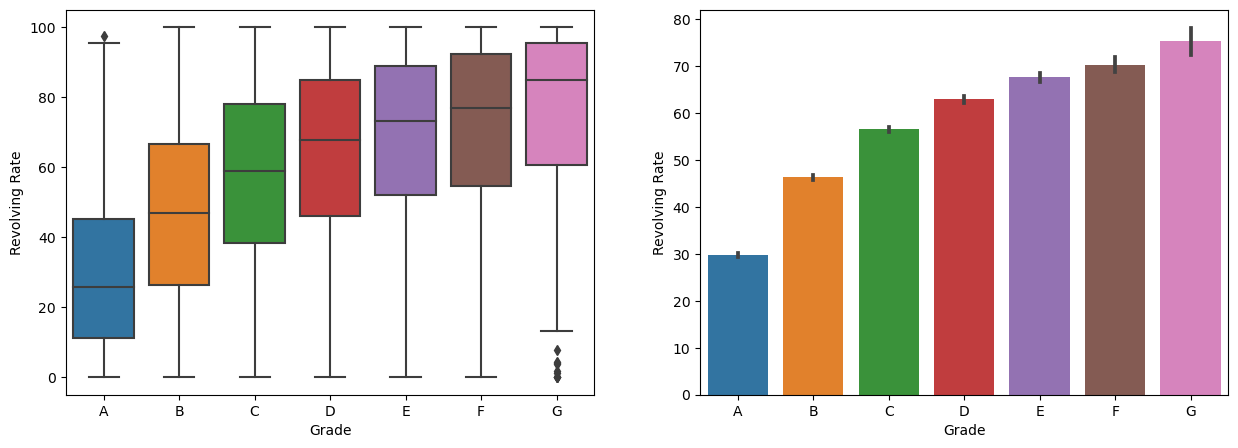

In [81]:
plot_cat_vs_cat('grade', 'revol_util', 'Grade', 'Revolving Rate',['A','B','C','D','E','F','G']  )

#### Observations

Revol util rate is increasing from grades A-G.

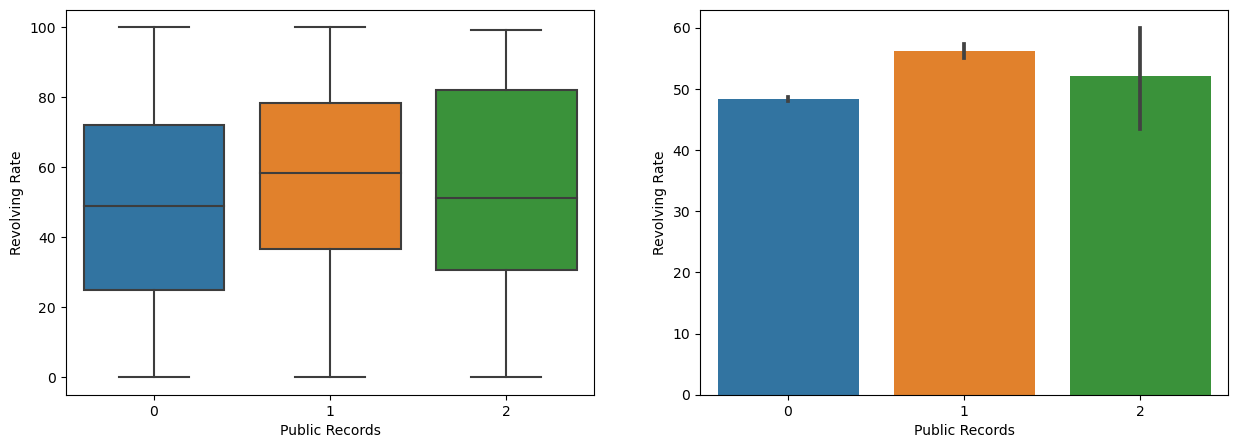

In [85]:
plot_cat_vs_cat('pub_rec', 'revol_util', 'Public Records', 'Revolving Rate'  )

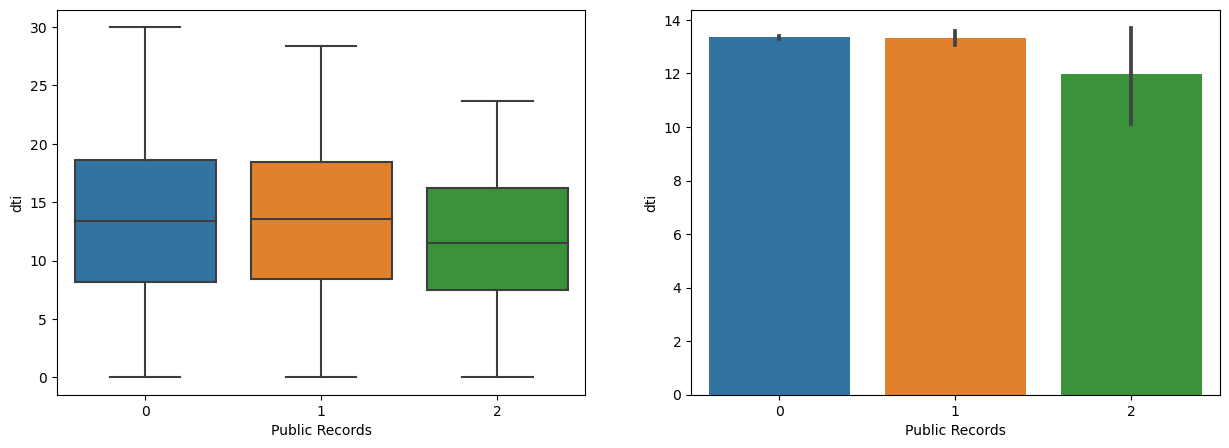

In [86]:
plot_cat_vs_cat('pub_rec', 'dti', 'Public Records', 'dti'  )